### Updated Steps and Code for `Customer_Segmentation_Try2.ipynb`

#### 1. **Import Libraries**
Make sure you have all necessary libraries imported at the start of your notebook.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelEncoder

#### 2. **Load the Dataset**
Load the dataset and display the first few rows.

In [2]:
# Load the dataset
data = pd.read_excel("bodyPerformance.xlsx")
print(data.head())

   age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0   27      M      172.3      75.24        21.3       80.0     130.0   
1   25      M      165.0      55.80        15.7       77.0     126.0   
2   31      M      179.6      78.00        20.1       92.0     152.0   
3   32      M      174.5      71.10        18.4       76.0     147.0   
4   28      M      173.8      67.70        17.1       70.0     127.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0       54.9                     18.4            60.0          217.0     C  
1       36.4                     16.3            53.0          229.0     A  
2       44.8                     12.0            49.0          181.0     C  
3       41.4                     15.2            53.0          219.0     B  
4       43.5                     27.1            45.0          217.0     B  


#### 3. **Data Exploration**
Check for missing values and summarize the dataset statistics.

In [3]:
# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())
print("Summary statistics:\n", data.describe())

Missing values in each column:
 age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64
Summary statistics:
                 age     height_cm     weight_kg    body fat_%     diastolic  \
count  13393.000000  13393.000000  13393.000000  13393.000000  13393.000000   
mean      36.775106    168.559807     67.447316     23.240165     78.796842   
std       13.625639      8.426583     11.949666      7.256844     10.742033   
min       21.000000    125.000000     26.300000      3.000000      0.000000   
25%       25.000000    162.400000     58.200000     18.000000     71.000000   
50%       32.000000    169.200000     67.400000     22.800000     79.000000   
75%       48.000000    174.800000

#### 4. **Data Visualization**
Visualize the data to understand distributions.

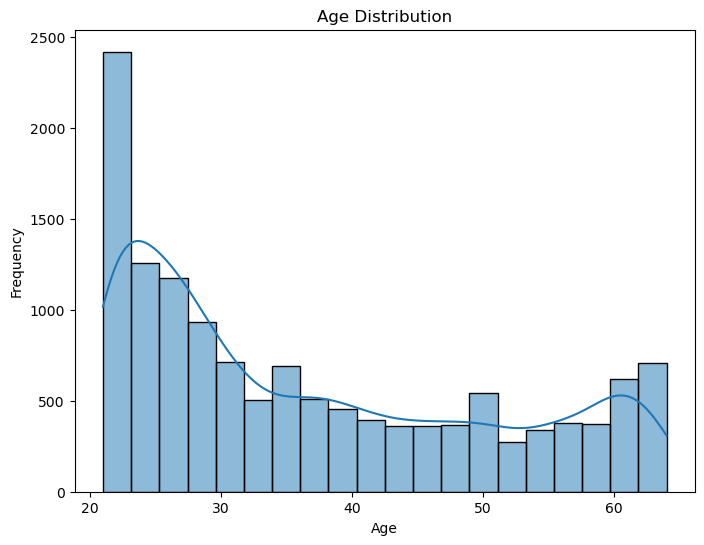

In [4]:
# Visualize the age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

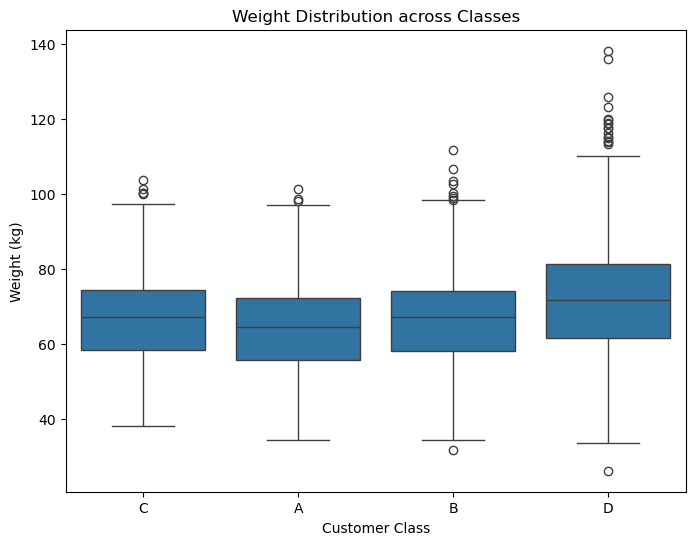

In [5]:
# Boxplot for weight distribution across customer classes
plt.figure(figsize=(8, 6))
sns.boxplot(x='class', y='weight_kg', data=data)
plt.title('Weight Distribution across Classes')
plt.xlabel('Customer Class')
plt.ylabel('Weight (kg)')
plt.show()

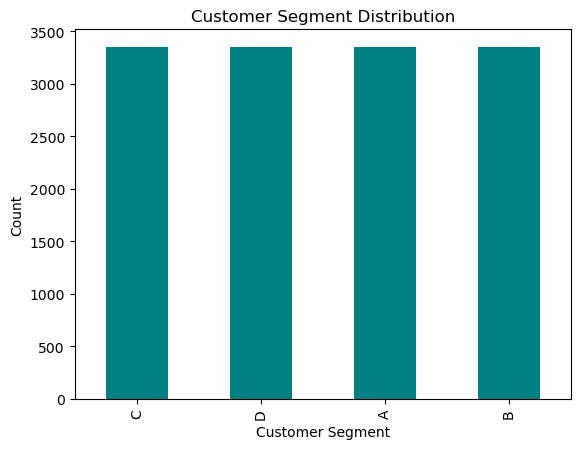

In [6]:
# Bar chart of customer segment distribution
data['class'].value_counts().plot(kind='bar', color='teal')
plt.title('Customer Segment Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.show()

#### 5. **Data Preparation**
Prepare the data by encoding the target variable.

In [7]:
# Label encode the target variable 'class'
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])

In [8]:
# Define features (X) and target variable (y)
X = data.drop('class', axis=1)  # Features
y = data['class']  # Target variable

#### 6. **Train-Test Split**
Split the data into training and testing sets.

In [9]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (10714, 11)
X_test shape: (2679, 11)


#### 7. **Model Training**
Train the Decision Tree Classifier.

In [10]:
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)

In [11]:
# Train the model
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'M'

#### 8. **Make Predictions**
Use the trained model to make predictions.

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

#### 9. **Model Evaluation**
Evaluate model performance using multiple metrics.

In [ ]:
# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

In [ ]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

#### 10. **Visualize the Confusion Matrix**
Use a heatmap for better visualization.

In [ ]:
# Visualizing the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### 11. **Plot ROC Curve**
Compute and plot the ROC curve for a more nuanced evaluation.

In [ ]:
# Get predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]  # For binary classification

In [ ]:
# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

In [ ]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#### 12. **Feature Importance**
Analyze the importance of features used in the model.

In [ ]:
# Feature importance
feature_importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

#### 13. **Hyperparameter Tuning (Optional)**
Consider using techniques like GridSearchCV for tuning.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, 7, None],
    'min_samples_split': [2, 3, 4]
}

In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)

In [ ]:
# Fit the model
grid_search.fit(X_train, y_train)

In [ ]:
# Get the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

#### 14. **Save the Model (Optional)**
Save your model for future use.

In [ ]:
import joblib

# Save the model to a file
joblib.dump(model, 'customer_segmentation_model.pkl')
print("Model saved successfully.")

### Final Notes
- **Model Evaluation:** The addition of ROC curve analysis and confusion matrix visualization enhances your understanding of model performance, especially in cases of class imbalance.
- **Feature Importance:** Understanding which features are most impactful helps to interpret the model better and make informed decisions.
- **Hyperparameter Tuning:** This step can improve your model's performance further, so consider implementing it if time allows.
- **Documentation:** Ensure your code is well-commented to clarify your thought process and steps taken throughout the project.

Implementing these steps will provide you with a more robust analysis and improve your overall model performance and insights. If you have any further questions or need assistance with specific areas, feel free to ask!